## Credit Sesame Take Home Assessment- Credit Card Default

### Hannah Lyon

![Photo from Nerdwallet](credit.jpeg)

Hi Everyone! Today I am going to tell you a story. The main character today is Hannah. She works at a bank that is losing a lot of money when people default on their credit debt. The bank wanted to find a solution to this problem and Hannah surmised that if the bank was able to identify individuals likely to default, then they could take preventative steps to avoid losing money. Hannah's solution was to build a predictive model that predicted whether an individual would default based on the data that the bank had on them. This data includes past billing and payment history, age, education, credit limit, and more. Let's see how Hannah built this mmodel. 

First, we import necessary libraries.

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTENC
import xgboost as xgb
from sklearn.model_selection import cross_validate, train_test_split
import random
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from IPython.display import Image

pd.set_option('display.max_columns', None)
sns.set()

Then, we load in our data and look at it.

In [119]:
df = pd.read_excel('data.xls', header=1)

In [120]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Exploratory Data Analysis 

Let's take a look at the data values!

Here we look for any abnormalities in range that may signal innacurate data or a strange value used to indicate a null.

In [121]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Now, we check for column data types and count null values.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Next, check the number of unique elements in each variable. This is useful for determining categorical versus continuous variables.

In [123]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

Looks like we have no nulls and the values are all in check, everything looks good!

For the next step, we check the target variable to determine whether there is a class imbalance. 

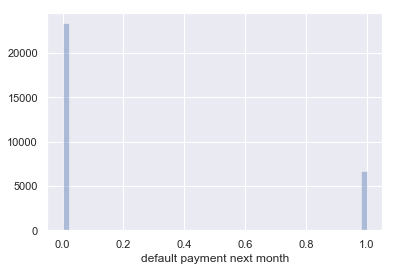

In [199]:
sns.distplot(df['default payment next month'], kde=False)

In [125]:
# only 22% of people defaulted-- Imbalanced!
df.loc[df['default payment next month'] == 1]['default payment next month'].sum() / len(df)

0.2212

In [126]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Looks like there is an imbalance! Only 22% of people defaulted.

Let's look at the distirbutions of the other variables.

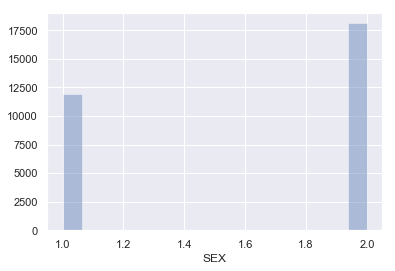

In [197]:
# Sex
sns.distplot(df['SEX'], kde=False) # more females default

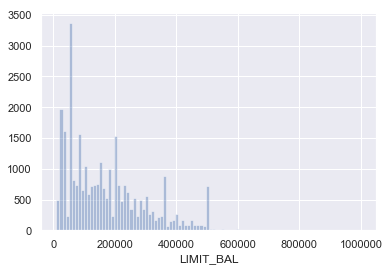

In [201]:
# Limit_Bal
sns.distplot(df['LIMIT_BAL'], bins=100, kde=False)

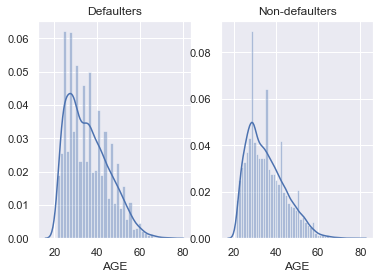

In [203]:
# check whether the age distributions are different between defaulters and non-defaulters
# Age
defaulters = df.loc[df['default payment next month'] == 1]
nondefaulters = df.loc[df['default payment next month'] == 0]

plt.subplot(1, 2, 1)
sns.distplot(defaulters['AGE'])
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.distplot(nondefaulters['AGE'])
plt.title('Non-defaulters')
plt.show()

In [130]:
# plt.plot(df[], df[]) # plot limit_bal with amount paid

In [131]:
# histogram of number of payments made 

### Prepare and Clean Data for Modeling

Now we get the data ready for modeling. Not much cleaning must be done as we have no outliers, no null values, and an all numeric dataset. Therefore we will start with splitting the data into train, validation, and test sets. 

In [132]:
# shuffle dataset
df = df.sample(len(df))
X = df.drop(['default payment next month', 'ID'], axis=1)
y = df['default payment next month']

In [133]:
def split_dataset(df, p=0.8):
    '''This function splits a Pandas DataFrame into train, validation,
    and test sets based on a parameter, p, that specifies the proportion
    of the dataset to use in the train set.
    
    Keyword arguments:
    df -- Dataframe to be split 
    p -- proportion of dataset to be in the train set (default=0.8)
    '''
    df = df.sample(len(df))
    split_1 = int(len(X) // 10 * (p * 10))
    split_2 = int(split_1 + (len(X) // 10 * ((1 - p) * 10)) // 2)
    
    train = df[:split_1]
    validation = df[split_1 : split_2]
    test = df[split_2:]
    
    X_train = train.drop(['default payment next month'], axis=1)
    X_val = validation.drop(['default payment next month'], axis=1)
    X_test = test.drop(['default payment next month'], axis=1)

    y_train = train['default payment next month']
    y_val = validation['default payment next month']
    y_test = test['default payment next month']
    
    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df.drop(['ID'], axis=1))

In [134]:
# validate correct lengths
len(X_train), len(X_val), len(X_test), len(y_train)

(24000, 2999, 3001, 24000)

### Baseine Model- Gradient Boosted Trees (GBTs)

About GBTs:

Gradient boosted trees 

Pros:
- Works great with tabular data
- Built in feature importance tracking with xgboost
- 

Cons:
- 

Ultimately, I chose this model due to it simplicty (simpler is always better!), explainability, and good performance.

In [135]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Discuss what hyperparameters are and why I chose them

In [136]:
param = {'max_depth': 5, 'eta': 0.01, 'objective': 'binary:logistic', 'eval_metric': 'error'}
watchlist = [(dval, 'eval'), (dtrain, 'train')]
# error = incorrect pred / n 

In [137]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=5)

[0]	eval-error:0.177059	train-error:0.174667
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 5 rounds.
[1]	eval-error:0.177392	train-error:0.174458
[2]	eval-error:0.177392	train-error:0.174708
[3]	eval-error:0.177392	train-error:0.1745
[4]	eval-error:0.177392	train-error:0.174708
[5]	eval-error:0.176392	train-error:0.174542
[6]	eval-error:0.176392	train-error:0.174542
Stopping. Best iteration:
[1]	eval-error:0.177392	train-error:0.174458



In [138]:
bst.save_model('baseline.model')

### Metrics

![Photo from ResearchGate](labels.png)

In [139]:
y_preds = bst.predict(dval)
y_preds = [1 if y > 0.5 else 0 for y in y_preds] # can adjust this based on risk tolerance

In [140]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2346
           1       0.68      0.36      0.47       653

    accuracy                           0.82      2999
   macro avg       0.76      0.65      0.68      2999
weighted avg       0.81      0.82      0.80      2999



In [183]:
tn, fp, fn, tp = confusion_matrix(y_val, y_preds).ravel()
(tn, fp, fn, tp)

(2183, 180, 349, 287)

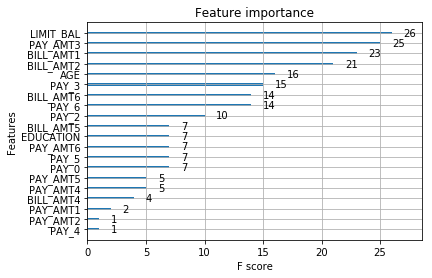

In [143]:
xgb.plot_importance(bst)

Model looks good! Train and validation error are about the same, so we are not overfitting. However, metrics like the F1 Score are still quite low for class 1.

Let's try improving our model!

### Second Model- feature engineering and oversampling

In [144]:
# total months late (sum positive integers in PAY_#)
pay = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df['MONTHS_LATE'] = pay.where(pay>0).sum(axis=1)

# total on time payments (all negative numbers in PAY_#)
df['ON_TIME'] = pay.where(pay<0).count(axis=1)

# Difference in debt over April 2005 - Sept 2005
df['diff'] = df['BILL_AMT1'] - df['BILL_AMT6']

# Proportion of credit limit spent by Sept 2005
df['prop'] = df['BILL_AMT1'] / df['LIMIT_BAL']

In [145]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df.drop(['ID'], axis=1))

In [146]:
ros = RandomOverSampler(0.5, random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [147]:
y_train.value_counts()

0    18649
1     9324
Name: default payment next month, dtype: int64

NOTE: I tried using SMOTE-NC here instead, however, it did not perform as well as plain oversampling. This may be due to the high feature space or the presence of categorical variables in the data.

In [185]:
# smotenc = SMOTENC(categorical_features=[0, 2], random_state=0)
# X_SMOTE, y_SMOTE = smotenc.fit_resample(X_train, y_train)

In [149]:
# dtrain = xgb.DMatrix(X_SMOTE, label=y_SMOTE)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 5, 'eta': 0.05, 'objective': 'binary:logistic', 'eval_metric': 'error'}
watchlist = [(dval, 'eval'), (dtrain, 'train')]

/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [171]:
num_round = 65
bst2 = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=10)

[0]	eval-error:0.178393	train-error:0.231974
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 10 rounds.
[1]	eval-error:0.178393	train-error:0.231723
[2]	eval-error:0.178726	train-error:0.231616
[3]	eval-error:0.178393	train-error:0.231652
[4]	eval-error:0.177392	train-error:0.231831
[5]	eval-error:0.177392	train-error:0.231831
[6]	eval-error:0.177726	train-error:0.231866
[7]	eval-error:0.177726	train-error:0.230687
[8]	eval-error:0.177726	train-error:0.230973
[9]	eval-error:0.178393	train-error:0.230043
[10]	eval-error:0.177059	train-error:0.229328
[11]	eval-error:0.177392	train-error:0.229436
[12]	eval-error:0.178726	train-error:0.229257
[13]	eval-error:0.178726	train-error:0.229364
[14]	eval-error:0.17906	train-error:0.228935
[15]	eval-error:0.178726	train-error:0.228864
[16]	eval-error:0.178726	train-error:0.229007
[17]	eval-error:0.179393	train-error:0.228077
[18]	eval-error:0.17906	train-error:

In [172]:
bst2.save_model('model_1.model')

### Metrics

In [173]:
y_preds = bst2.predict(dval)
y_preds = [1 if y > 0.5 else 0 for y in y_preds] # can adjust this based on risk tolerance

In [174]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2363
           1       0.61      0.45      0.52       636

    accuracy                           0.82      2999
   macro avg       0.74      0.69      0.71      2999
weighted avg       0.81      0.82      0.81      2999



Wow! Better recall, and F1 score!

In [175]:
tn, fp, fn, tp = confusion_matrix(y_val, y_preds).ravel()
(tn, fp, fn, tp)

(2183, 180, 349, 287)

In [176]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)

0.6875417535006401

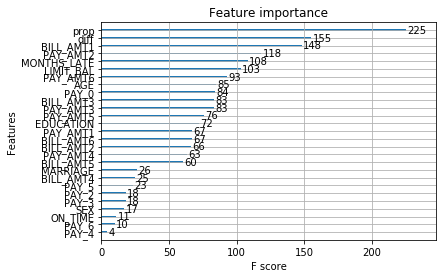

In [177]:
xgb.plot_importance(bst2)

### Final Model Scoring

In [178]:
final_y_preds = bst2.predict(dtest)
final_y_preds = [1 if y > 0.5 else 0 for y in final_y_preds] # can adjust this based on risk tolerance

In [179]:
print(classification_report(y_test, final_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2352
           1       0.58      0.44      0.50       649

    accuracy                           0.81      3001
   macro avg       0.72      0.68      0.69      3001
weighted avg       0.80      0.81      0.80      3001



In [180]:
tn, fp, fn, tp = confusion_matrix(y_test, final_y_preds).ravel()
(tn, fp, fn, tp)

(2148, 204, 365, 284)

### Findings

The losses associated with credit card default are significant. That is why it is important to identify members who are at risk of defaulting on their credit, so that an intervention (e.g. limiting credit further) can be made and potential losses avoided. Through this model, we can do exactly that. By looking at past billing and payment history, credit limit, age, education, and other data we possess, we can create a predictive model.

Some notes on our model:

Our model did better than just guessing the majority class 100% of the time. 

We were also not overfitting the model because the final metrics were consistent with those we got on our test and validation sets.

Our engineered features ended up being fairly important in the model. 

Future suggestions:

Productionize the model and use monthly to find those likliest to default.